# Gathering

In this part, we will be loading csv and tsv file from downloaded onto my computed. For collecting retweet and like counts, I will be using the tweepy library to query Twitter's API to extract the information.


In [1]:
#Calling Pandas and the first two relevant files

import pandas as pd
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [1]:
#Using Tweepy to extract retweet and like counts

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'My consumer key'
consumer_secret = 'My consumer secret'
access_token = 'my access token'
access_secret = 'My access secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

df_1 = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'pd' is not defined

# Assessing 

In this part, I will use the info function to asses all the data available to me.

In [2]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Cleaning

In this part, I will call out cleaning and tidying issues and correct them one by one. PS- Tidyness issues are written out. For all others, they are cleanliness issues.

### 1) Data framing the tweet_json.txt file (Tidy #1)

In [3]:
# This will convert the .txt into a data frame that will be later be
# merged with the other 2 data frames

import json
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


In [7]:
# Test
df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7612,35899
1,892177421306343426,5638,30968
2,891815181378084864,3730,23308
3,891689557279858688,7785,39183
4,891327558926688256,8385,37439
5,891087950875897856,2810,18860
6,890971913173991426,1829,10954
7,890729181411237888,17005,60454
8,890609185150312448,3872,25952
9,890240255349198849,6619,29641


 ### 2) Changing data type of 'tweet_id'

In [4]:
# In order to successfully merge all three data frameworks, the 'tweet_id'
# variable needs to be the same data format as the others

df['tweet_id'] = pd.to_numeric(df['tweet_id'])

In [9]:
#Test
df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7612,35899
1,892177421306343426,5638,30968
2,891815181378084864,3730,23308
3,891689557279858688,7785,39183
4,891327558926688256,8385,37439
5,891087950875897856,2810,18860
6,890971913173991426,1829,10954
7,890729181411237888,17005,60454
8,890609185150312448,3872,25952
9,890240255349198849,6619,29641


### 3) Removing each data frame of unwanted columns 

In [5]:
#Some columns from the 3 data frames seem uncesessary to my analysis,
#so I will delete them for convinience purpose

df_archive = df_archive.drop(['in_reply_to_status_id', 'expanded_urls', 'in_reply_to_user_id', 'timestamp' , 'source', 'retweeted_status_timestamp', 'doggo', 'floofer','pupper','puppo'], axis=1)

In [11]:
#Test
df_archive.head()


,tweet_id,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,13,10,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,13,10,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,12,10,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,13,10,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,12,10,Franklin


In [6]:
df_image = df_image.drop(['jpg_url', 'img_num','p1_dog', 'p2_dog', 'p3_dog', 'p2','p2_conf','p3','p3_conf'], axis=1)

In [13]:
#Test
df_image.head(4)

,tweet_id,p1,p1_conf
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143


### 4) Merging all 3 tables into 1 (Tidy #2)

In [7]:
# Now I will merge all 3 data frames into 1

df_clean_1 = pd.merge(df, df_image,
                            on=['tweet_id'], how='left')

In [8]:
df_clean_2 = pd.merge(df_clean_1, df_archive,
                            on=['tweet_id'], how='left')

In [ ]:
#Test
df_clean_2.head()

In [16]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 11 columns):
tweet_id                    14 non-null int64
retweet_count               14 non-null int64
favorite_count              14 non-null int64
p1                          14 non-null object
p1_conf                     14 non-null float64
text                        14 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
rating_numerator            14 non-null int64
rating_denominator          14 non-null int64
name                        14 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ KB


### 5) Capatalize column 'Names'

In [9]:
df_clean_2.name = df_clean_2.name.str.title()

In [ ]:
#Test
df_clean_2.head()

### 6) Delete underscore from all elements in column 'p1' and then capitalize them

In [10]:
df_clean_2.p1 = df_clean_2.p1.str.replace('_', ' ')

In [11]:
df_clean_2.p1 = df_clean_2.p1.str.title()

In [16]:
#Test
df_clean_2.head()

,tweet_id,retweet_count,favorite_count,p1,p1_conf,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name
0,892420643555336193,7617,35902,Orange,0.097049,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,13,10,Phineas
1,892177421306343426,5641,30974,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,NaN,NaN,13,10,Tilly
2,891815181378084864,3733,23312,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,12,10,Archie
3,891689557279858688,7787,39186,Paper Towel,0.170278,This is Darla. She commenced a snooze mid meal...,NaN,NaN,13,10,Darla


In [20]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 11 columns):
tweet_id                    14 non-null int64
retweet_count               14 non-null int64
favorite_count              14 non-null int64
p1                          14 non-null object
p1_conf                     14 non-null float64
text                        14 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
rating_numerator            14 non-null int64
rating_denominator          14 non-null int64
name                        14 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ KB


### 7) Suppress any scientific notion in the data (observed in a few columns) frame

In [12]:
# I noticed scientific numbering on exploring all 3 data sets.
# The function below will suppress any numbering in the form of scientific notions
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
#Test
df_clean_2.head()

### 8) Delete rows where 'p1' column values are null

In [13]:
# My assessment will focus on column p1 being complete
# because the breed of the dog is the topic of assessment
df_clean_2 = df_clean_2.dropna(axis=0, subset=['p1'])

In [16]:
#Test
df_clean_2.head()

,tweet_id,retweet_count,favorite_count,p1,p1_conf,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name
0,892420643555336193,7612,35899,Orange,0.09705,This is Phineas. He's a mystical boy. Only eve...,nan,nan,13,10,Phineas
1,892177421306343426,5638,30968,Chihuahua,0.32358,This is Tilly. She's just checking pup on you....,nan,nan,13,10,Tilly
2,891815181378084864,3730,23308,Chihuahua,0.71601,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,12,10,Archie
3,891689557279858688,7785,39183,Paper Towel,0.17028,This is Darla. She commenced a snooze mid meal...,nan,nan,13,10,Darla
4,891327558926688256,8385,37439,Basset,0.55571,This is Franklin. He would like you to stop ca...,nan,nan,12,10,Franklin


### 9) Create new column of ratio 'rating_numerator / rating_denominator'

In [14]:
# I created this ratio to make the reading of the ratings easier.

df_clean_2['Liking_Ratio'] = df_clean_2.rating_numerator / df_clean_2.rating_denominator

In [22]:
#Test
df_clean_2.head()

,tweet_id,retweet_count,favorite_count,p1,p1_conf,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name,Ratio
0,892420643555336193,7617,35902,Orange,0.09705,This is Phineas. He's a mystical boy. Only eve...,nan,nan,13,10,Phineas,1.30000
1,892177421306343426,5641,30974,Chihuahua,0.32358,This is Tilly. She's just checking pup on you....,nan,nan,13,10,Tilly,1.30000
2,891815181378084864,3733,23312,Chihuahua,0.71601,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,12,10,Archie,1.20000
3,891689557279858688,7787,39186,Paper Towel,0.17028,This is Darla. She commenced a snooze mid meal...,nan,nan,13,10,Darla,1.30000
4,891327558926688256,8389,37443,Basset,0.55571,This is Franklin. He would like you to stop ca...,nan,nan,12,10,Franklin,1.20000
5,891087950875897856,2812,18860,Chesapeake Bay Retriever,0.42560,Here we have a majestic great white breaching ...,nan,nan,13,10,None,1.30000
6,890971913173991426,1829,10955,Appenzeller,0.34170,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,13,10,Jax,1.30000
7,890729181411237888,17014,60469,Pomeranian,0.56614,When you watch your owner call another dog a g...,nan,nan,13,10,None,1.30000
8,890609185150312448,3872,25958,Irish Terrier,0.48757,This is Zoey. She doesn't want to be one of th...,nan,nan,13,10,Zoey,1.30000
9,890240255349198849,6620,29649,Pembroke,0.51132,This is Cassie. She is a college pup. Studying...,nan,nan,14,10,Cassie,1.40000


### 10) Calculating a new column likes/retweet that would create a metric explaining the exposure of a post per retweet

In [15]:
# For analysis purpose, I created a column that gives the number of likes
# per retweet which I see as a metric for exposure

df_clean_2['Exposure'] = df_clean_2.favorite_count / df_clean_2.retweet_count 

In [19]:
#Test
df_clean_2

,tweet_id,retweet_count,favorite_count,p1,p1_conf,text,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name,Liking_Ratio,Exposure
0,892420643555336193,7612,35899,Orange,0.09705,This is Phineas. He's a mystical boy. Only eve...,nan,nan,13,10,Phineas,1.30000,4.71611
1,892177421306343426,5638,30968,Chihuahua,0.32358,This is Tilly. She's just checking pup on you....,nan,nan,13,10,Tilly,1.30000,5.49273
2,891815181378084864,3730,23308,Chihuahua,0.71601,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,12,10,Archie,1.20000,6.24879
3,891689557279858688,7785,39183,Paper Towel,0.17028,This is Darla. She commenced a snooze mid meal...,nan,nan,13,10,Darla,1.30000,5.03314
4,891327558926688256,8385,37439,Basset,0.55571,This is Franklin. He would like you to stop ca...,nan,nan,12,10,Franklin,1.20000,4.46500
5,891087950875897856,2810,18860,Chesapeake Bay Retriever,0.42560,Here we have a majestic great white breaching ...,nan,nan,13,10,None,1.30000,6.71174
6,890971913173991426,1829,10954,Appenzeller,0.34170,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,13,10,Jax,1.30000,5.98907
7,890729181411237888,17005,60454,Pomeranian,0.56614,When you watch your owner call another dog a g...,nan,nan,13,10,None,1.30000,3.55507
8,890609185150312448,3872,25952,Irish Terrier,0.48757,This is Zoey. She doesn't want to be one of th...,nan,nan,13,10,Zoey,1.30000,6.70248
9,890240255349198849,6619,29641,Pembroke,0.51132,This is Cassie. She is a college pup. Studying...,nan,nan,14,10,Cassie,1.40000,4.47817


### 11) Reordering the columns and further removing unnecessary columns

In [16]:
# For a clean and quality data frame, I've further removed some columns
# and rearranged the columns
df_clean_2 = df_clean_2 [['tweet_id', 'name', 'p1', 'p1_conf','text', 'Liking_Ratio', 'retweet_count', 'favorite_count','Exposure']]

In [21]:
#Test
df_clean_2.head(2)

,tweet_id,name,p1,p1_conf,text,Liking_Ratio,retweet_count,favorite_count,Exposure
0,892420643555336193,Phineas,Orange,0.09705,This is Phineas. He's a mystical boy. Only eve...,1.30000,7612,35899,4.71611
1,892177421306343426,Tilly,Chihuahua,0.32358,This is Tilly. She's just checking pup on you....,1.30000,5638,30968,5.49273


## 12)

In [17]:
df_clean_2 = df_clean_2[~df_clean_2.p1.str.match('Orange', 'Paper Towel')]

In [18]:
df_clean_2.to_csv('dataset.csv', index=False)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [45]:
df_clean_2.describe()

,tweet_id,p1_conf,Liking_Ratio,retweet_count,favorite_count,Exposure
count,13.00000,13.00000,13.00000,13.00000,13.00000,13.00000
mean,890756918104480256.00000,0.56856,1.28462,6294.07692,30853.61538,5.38131
std,844119752575579.12500,0.26579,0.05547,3896.35144,12465.64056,0.99685
min,889638837579907072.00000,0.17028,1.20000,1829.00000,10954.00000,3.55507
25%,890006608113172480.00000,0.37742,1.30000,3872.00000,25146.00000,4.47817
50%,890729181411237888.00000,0.51132,1.30000,5638.00000,28540.00000,5.49273
75%,891327558926688256.00000,0.71601,1.30000,7785.00000,37439.00000,6.22118
max,892177421306343424.00000,0.99165,1.40000,17005.00000,60454.00000,6.71174


Text(0.5,1,'Twitter exposure WeRateDogs')

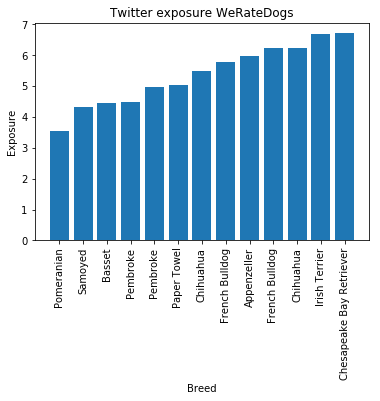

In [23]:
df_clean_2.sort_values('Exposure',inplace=True)
plt.bar(x=np.arange(1,14),height=df_clean_2['Exposure'])
plt.xticks(np.arange(1,14), df_clean_2['p1'], rotation=90)

plt.xlabel("Breed")
plt.ylabel("Exposure")
plt.title("Twitter exposure WeRateDogs")